In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


df = pd.read_csv('./listings.csv')
df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [116]:
df_new= df[['review_scores_value', 'price','reviews_per_month']]

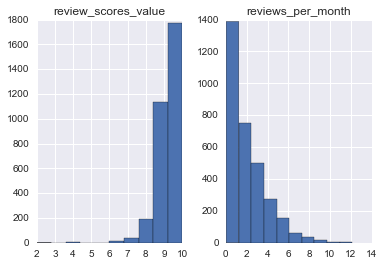

In [117]:
df_new.hist();

In [105]:
def clean_price_field(df, fieldname):
    df[fieldname] = [x.strip('$') for x in df[fieldname]]
    df[fieldname] = [x.replace(',','') for x in df[fieldname]]
    df[fieldname] = df[fieldname].astype(float)
    return df[fieldname]



In [118]:
df_new['price'] = clean_price_field(df_new, 'price')
df_new['price'].head()

/Users/dg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/dg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/dg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

0     85
1    150
2    975
3    100
4    450
Name: price, dtype: float64

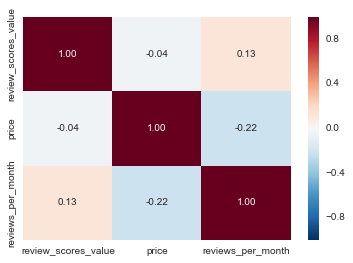

In [119]:
sns.heatmap(df_new.corr(), annot=True, fmt=".2f");

In [120]:
df_dropna = df_new.dropna(axis=0)

In [121]:
# Consider only numerical variables
X = df_dropna[['review_scores_value','reviews_per_month']]
y = df_dropna['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.0378704544136 on 949 values.'

In [122]:
drop_price_df = df_new.dropna(subset=['price']) #Drop the rows with missing salaries

# test look
drop_price_df.head()
drop_price_df.shape


(3818, 3)

In [123]:
fill_df = drop_price_df.fillna(drop_price_df.mean()) #Fill all missing values with the mean of the column.

# test look
fill_df.head()

,review_scores_value,price,reviews_per_month
0,10.000000,85,4.070000
1,10.000000,150,1.480000
2,10.000000,975,1.150000
3,9.452245,100,2.078919
4,9.000000,450,0.890000


In [124]:
# Consider only numerical variables
X = fill_df[['review_scores_value','reviews_per_month']]
y = fill_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.0343041130869 on 1146 values.'

In [125]:
cat_df = df.select_dtypes(include=['object']).copy()

cat_df.shape[1]

62

In [126]:
len(cat_df.columns[cat_df.isnull().mean() == 0])
len(cat_df.columns[cat_df.isnull().mean() > 0.5])
len(cat_df.columns[cat_df.isnull().mean() > 0.75])

0

In [127]:
#Create a copy of the dataframe
cat_df_copy = cat_df.copy()
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
#My Solution    
    df = pd.get_dummies(df,columns=cat_cols,dummy_na=dummy_na,prefix_sep='_');
    return df
#     for col in  cat_cols:
#         try:
#             #for each cat add dummy var, drop original column
#             df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
#         except:
#             continue
#     return df
        
     

In [131]:
df['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
5       $120.00
6        $80.00
7        $60.00
8        $90.00
9       $150.00
10       $95.00
11       $99.00
12      $245.00
13      $165.00
14      $461.00
15      $109.00
16       $66.00
17       $99.00
18      $200.00
19      $700.00
20      $110.00
21       $99.00
22      $450.00
23       $75.00
24      $600.00
25      $450.00
26      $150.00
27       $45.00
28      $300.00
29       $80.00
         ...   
3788    $115.00
3789     $60.00
3790    $175.00
3791     $85.00
3792    $109.00
3793    $109.00
3794    $107.00
3795    $200.00
3796     $85.00
3797     $70.00
3798     $77.00
3799     $65.00
3800    $185.00
3801    $108.00
3802    $200.00
3803    $250.00
3804    $125.00
3805    $100.00
3806    $160.00
3807    $109.00
3808    $175.00
3809    $120.00
3810    $154.00
3811     $65.00
3812     $95.00
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, dtype: obje

In [134]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    df = df.dropna(subset=[response_col]);
    df = df.dropna(how='all', axis=1);
    df_cat = create_dummy_df(df, cat_cols, dummy_na);
    df[response_col] = clean_price_field(df, response_col);
   
    #Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df_cat = df_cat.apply(fill_mean, axis=0)

    X = df.drop(response_col, axis=1);
    X = df_cat
    y = df[[response_col]]
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state);
    ln_model = LinearRegression(normalize=True);
    ln_model.fit(X_train, y_train)
    ypreds_train = ln_model.predict(X_train);
    train_score = r2_score(y_train, ypreds_train)
    ypreds_test = ln_model.predict(X_test);
    test_score = r2_score(y_test, ypreds_test);

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

# X=clean_fit_linear_mod(df_new, 'Salary', cat_cols_lst, dummy_na=False)
# X
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df, 'price', cat_cols_lst, dummy_na=False)

In [136]:
"The r-squared score for your model was {} on {} values.".format(test_score, len(y_test))

'The r-squared score for your model was 0.397174846442 on 1146 values.'

In [94]:
df_cal = pd.read_csv('./calendar.csv')
df_cal.tail()

,listing_id,date,available,price
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN
1393569,10208623,2017-01-02,f,NaN


In [95]:
sorted_list = df_cal.sort_values(by=["listing_id","date"])
sorted_list.head()



,listing_id,date,available,price
797160,3335,2016-01-04,f,NaN
797161,3335,2016-01-05,f,NaN
797162,3335,2016-01-06,f,NaN
797163,3335,2016-01-07,f,NaN
797164,3335,2016-01-08,f,NaN


In [96]:
df_dropped_na = sorted_list.dropna()
df_dropped_na.head(1000)


,listing_id,date,available,price
797216,3335,2016-02-29,t,$120.00
797217,3335,2016-03-01,t,$120.00
797218,3335,2016-03-02,t,$120.00
797219,3335,2016-03-03,t,$120.00
797220,3335,2016-03-04,t,$120.00
797221,3335,2016-03-05,t,$120.00
797222,3335,2016-03-06,t,$120.00
797223,3335,2016-03-07,t,$120.00
797224,3335,2016-03-08,t,$120.00
797225,3335,2016-03-09,t,$120.00


In [106]:
df_dropped_na['price'] = clean_price_field(df_dropped_na, "price")
df_dropped_na.head(1000)

/Users/dg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/dg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/dg/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,listing_id,date,available,price
797216,3335,2016-02-29,t,120
797217,3335,2016-03-01,t,120
797218,3335,2016-03-02,t,120
797219,3335,2016-03-03,t,120
797220,3335,2016-03-04,t,120
797221,3335,2016-03-05,t,120
797222,3335,2016-03-06,t,120
797223,3335,2016-03-07,t,120
797224,3335,2016-03-08,t,120
797225,3335,2016-03-09,t,120


In [112]:
prev_listing_id = 0
calendar_data = []
for index, row in df_dropped_na.iterrows():
    if prev_listing_id != row['listing_id'] and prev_listing_id != 0:
        calendar_data.append([prev_listing_id, 'winter', winter_sum/winter_count if winter_count else 0])
        calendar_data.append([prev_listing_id, 'spring', spring_sum/spring_count if spring_count else 0])
        calendar_data.append([prev_listing_id, 'summer', summer_sum/summer_count if summer_count else 0])
        calendar_data.append([prev_listing_id, 'fall', fall_sum/fall_count if fall_count else 0])
        winter_sum = spring_sum= summer_sum= fall_sum= winter_count= spring_count= summer_count= fall_count = 0 
    if row['date'] >="2016-01-01" and row['date'] <="2016-02-29":
        winter_sum += row['price']
        winter_count +=1
    if row['date'] >="2016-03-01" and row['date'] <="2016-05-31":
        spring_sum += row['price']
        spring_count += 1
    if row['date'] >="2016-06-01" and row['date'] <="2016-08-31":
        summer_sum += row['price']
        summer_count += 1
    if row['date'] >="2016-09-01" and row['date'] <="2016-11-30":
        fall_sum += row['price']
        fall_count += 1
    if row['date'] >="2016-12-01" and row['date'] <="2016-12-31":
        winter_sum += row['price']
        winter_count += 1
    prev_listing_id = row['listing_id']
calendar_data.append([prev_listing_id, 'winter', winter_sum/winter_count if winter_count else 0])
calendar_data.append([prev_listing_id, 'spring', spring_sum/spring_count if spring_count else 0])
calendar_data.append([prev_listing_id, 'summer', summer_sum/summer_count if summer_count else 0])
calendar_data.append([prev_listing_id, 'fall', fall_sum/fall_count if fall_count else 0])
df_new_calendar = pd.DataFrame(calendar_data,columns=['listing_id','season', 'price'])
            


    

In [113]:
df_new_calendar

,listing_id,season,price
0,3335,winter,141.428571
1,3335,spring,139.458599
2,3335,summer,133.888889
3,3335,fall,138.059211
4,4291,winter,82.000000
5,4291,spring,82.000000
6,4291,summer,82.000000
7,4291,fall,82.000000
8,5682,winter,50.328125
9,5682,spring,54.491803


In [158]:
df_new_calendar.rename(columns={'price':'seasonal_price'}, inplace=True)

In [159]:
df_new_calendar.head()

,listing_id,season,seasonal_price
0,3335,winter,141.428571
1,3335,spring,139.458599
2,3335,summer,133.888889
3,3335,fall,138.059211
4,4291,winter,82.000000


In [160]:
df_numeric_vals.rename(columns={'id':'listing_id'}, inplace=True)


In [162]:
df.shape

(3818, 92)

In [163]:
df.rename(columns={'id':'listing_id'}, inplace=True)
df_merged = pd.merge(df_new_calendar, df, on="listing_id")
df_merged.shape

(14892, 94)

In [303]:
df_merged = df_merged[df_merged.season == "winter"]
df_merged.shape

(3723, 94)

In [304]:
df_numeric_vals = df_merged[["accommodates", "seasonal_price"]]
# df_numeric_vals = df_merged[["review_scores_rating", "review_scores_accuracy","review_scores_cleanliness",
#          "review_scores_checkin","review_scores_communication","review_scores_location",
#                       "review_scores_value","accommodates", "seasonal_price"]]
df_numeric_vals.shape
df_numeric_vals.dtypes

accommodates        int64
seasonal_price    float64
dtype: object

In [305]:
df_numeric_vals.shape

(3723, 2)

In [278]:
df_numeric_vals
df_numerics_only = df_numeric_vals.dropna()
# fill_mean = lambda col: col.fillna(col.mean())
# # Fill the mean
# df_numeric_vals = df_numeric_vals.apply(fill_mean, axis=0)
df_numerics_only.shape

(12352, 9)

In [223]:
# Consider only numerical variables

X = df_numerics_only.drop("seasonal_price", axis=1);
y = df_numerics_only['seasonal_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:
#Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
X = X.apply(fill_mean, axis=0)

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.353428662644 on 3722 values.'

In [311]:
df_category = df_merged[["property_type", "neighbourhood_group_cleansed","room_type"]]
df_category.shape

(3723, 3)

In [312]:
df_category_new = create_dummy_df(df_category, ["property_type","neighbourhood_group_cleansed","room_type"], True)
df_category_new.shape

(3723, 39)

In [313]:
df_final = pd.concat([df_numeric_vals, df_category_new], axis=1)
df_final.shape

(3723, 41)

In [329]:
df_final = df_final.dropna()
df_final

,accommodates,seasonal_price,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,...,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan
0,4,141.428571,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2,82.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,2,50.328125,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,2,92.954545,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16,2,85.000000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
20,2,78.181818,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,2,109.714286,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28,4,165.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
32,3,125.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
36,6,121.395349,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [328]:

X = df_final.drop("seasonal_price", axis=1);
y = df_final['seasonal_price']



#Four steps:
#Mean function
# fill_mean = lambda col: col.fillna(col.mean())
# # Fill the mean
# X = X.apply(fill_mean, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=37)

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))
# "Predicted {} vs actual {}".format(y_test_preds, [y_test])



'The r-squared score for your model was 0.462256181861 on 1117 values.'